# Consumo Calculado y Predicho

## A considerar:
Interpretación de los Resultados:

- Valores Positivos: Indican que se espera tener un inventario positivo de ese insumo al final del mes. Por ejemplo, para mayo de 2024, se espera tener un inventario de aproximadamente 19,384 unidades.
- Valores Negativos: Indican que se espera un inventario negativo, lo que implica una posible escasez o déficit del insumo. Por ejemplo, para septiembre de 2024, se predice un déficit de aproximadamente 28,569 unidades.
  
Identificación de la Fecha y Cantidad Óptima para Pedido:

- Dado que la fecha óptima para hacer un pedido es aquella en la que el inventario proyectado es mínimo (especialmente si es negativo), puedes tomar la fecha con el inventario más negativo como la señal para realizar un pedido.

**La cantidad a pedir debe cubrir el déficit y adicionalmente asegurar un inventario suficiente para el próximo periodo.**

## Data

In [2]:
import pandas as pd

# Definir las rutas de los archivos Excel
file_paths = [
    'datasets_xlsx/2022/cuadro-insumos-medico-quirurgico-enero-2022.xlsx',
    'datasets_xlsx/2022/inventario-de-insumos-medico-quirurgico-febrero-2022.xlsx',
    'datasets_xlsx/2022/inventario-de-insumo-medico-quirurgico-marzo-2022.xlsx',
    'datasets_xlsx/2022/inventario-de-medicamentos-abril-2022.xlsx',
    'datasets_xlsx/2022/inventario-de-insumo-medico-quirurgico-de-mayo-2022.xlsx',
    'datasets_xlsx/2022/inventario-insumos-medico-quirurgico-junio-2022.xlsx',
    'datasets_xlsx/2022/inventario-de-medico-quirurgico-julio-2022.xlsx',
    'datasets_xlsx/2022/inventario-de-insumos-medico-quirurgico-agosto-2022.xlsx',
    'datasets_xlsx/2022/inventario-de-insumos-medico-quirurgico-septiembre-2022.xlsx',
    'datasets_xlsx/2022/inventario-insumos-medico-quirurgico-octubre-2022.xlsx',
    'datasets_xlsx/2022/inventario-medico-quirurgico-nov.-2022.xlsx',
    'datasets_xlsx/2022/inventario-medico-quirugico-dic.-2022.xlsx',
    'datasets_xlsx/2023/cuadro-de-inventario-insumos-medico-quirurgico-enero-2023.xlsx',
    'datasets_xlsx/2023/cuadro-de-inventario-insumos-medico-quirurgico-febrero-2023.xlsx',
    'datasets_xlsx/2023/cuadro-de-inventario-insumos-medico-quirurgico-marzo-2023.xlsx',
    'datasets_xlsx/2023/cuadro-de-inventario-insumos-medico-quirurgico-abril-2023.xlsx',
    'datasets_xlsx/2023/cuadro-de-inventario-de-medico-quirurgico-de-mayo-2023.xlsx',
    'datasets_xlsx/2023/cuadro-de-inventario-de-medico-quirurgico-de-junio-2023.xlsx',
    'datasets_xlsx/2023/cuadro-de-inventario-de-medico-quirurgico-de-julio-2023.xlsx',
    'datasets_xlsx/2023/cuadro-de-inventario-medico-quirurgico-agosto-2023.xlsx',
    'datasets_xlsx/2023/inventario-mq-a-septiembre-2023.xlsx',
    'datasets_xlsx/2023/cuadro-de-inventario-medico-quirurgico-octubre-2023.xlsx',
    'datasets_xlsx/2023/cuadro-de-inventario-medico-quirurgico-nov.-2023.xlsx',
    'datasets_xlsx/2023/cuadro-de-inventario-medico-quirurgico-dic.-2023.xlsx',
    'datasets_xlsx/2024/cuadro-de-inventario-insumos-medico-quirurgico-enero-2024.xlsx',
    'datasets_xlsx/2024/cuadro-de-inventario-de-insumos-medicos-quirurgico-feb.-2024.xlsx',
    'datasets_xlsx/2024/inventario-insumos-medico-quirurgico-marzo-2024.xlsx',
    'datasets_xlsx/2024/cuadro-de-inventario-mq-abril-2024.xlsx'
]

months = [
    '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', 
    '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
    '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01', 
    '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
    '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01'
]

# Leer los archivos Excel en DataFrames y añadir una columna para el mes correspondiente
dfs = []

for file_path, month in zip(file_paths, months):
    df = pd.read_excel(file_path)
    df = df.iloc[:, [0, 1, -2]]  # Seleccionar las columnas por índice
    df['Fecha'] = month  # Añadir la columna de la fecha
    df = df.rename(columns={df.columns[2]: 'Inventario'})  # Renombrar la columna -2
    dfs.append(df)

# Concatenar todos los DataFrames
df_combined = pd.concat(dfs, ignore_index=True)

# Renombrar las columnas
df_combined.columns = ['Codigo', 'Insumo', 'Inventario', 'Fecha']

# Obtener Dataframe Codigo, nombre
df_insumos = df_combined[['Codigo', 'Insumo']]

# Reordenar las columnas
df_combined = df_combined[['Fecha', 'Insumo', 'Inventario']]

# Contar el número de ceros por cada 'Insumo'
def count_zeros(df):
    return (df['Inventario'] == 0).sum()

# Filtrar los insumos con al menos 2 ceros
filtered_insumos = df_combined.groupby('Insumo').filter(lambda x: count_zeros(x) <= 2)

# Crear una tabla pivote
pivot_table = filtered_insumos.pivot_table(
    index='Insumo',         # Las filas serán los insumos
    columns='Fecha',        # Las columnas serán las fechas
    values='Inventario',    # Los valores serán los inventarios
    aggfunc='sum'           # La función de agregación será la suma
).fillna(0)

# Contar los ceros en cada fila
zero_counts = (pivot_table == 0).sum(axis=1)

# Filtrar las filas que tienen a lo sumo 2 ceros
filtered_pivot_table = pivot_table[zero_counts <= 2]

# Calcular el consumo (diferencia de inventarios entre meses consecutivos)
consumption = filtered_pivot_table.diff(axis=1).fillna(0)

# Mostrar el consumo
# import ace_tools as tools; tools.display_dataframe_to_user(name="Consumo de Insumos Médico-Quirúrgicos", dataframe=consumption)


In [26]:
consumption.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, APOSITO OCULAR ADULTO ESTERIL to VENDA DE YESO     (SE SOLICITA DE FRAGUADO RÁPIDO DE 3" X 3 YARDAS, DE MAXIMO DE 5 MINUTOS)
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2022-01-01  59 non-null     float64
 1   2022-02-01  59 non-null     float64
 2   2022-03-01  59 non-null     float64
 3   2022-04-01  59 non-null     float64
 4   2022-05-01  59 non-null     float64
 5   2022-06-01  59 non-null     float64
 6   2022-07-01  59 non-null     float64
 7   2022-08-01  59 non-null     float64
 8   2022-09-01  59 non-null     float64
 9   2022-10-01  59 non-null     float64
 10  2022-11-01  59 non-null     float64
 11  2022-12-01  59 non-null     float64
 12  2023-01-01  59 non-null     float64
 13  2023-02-01  59 non-null     float64
 14  2023-03-01  59 non-null     float64
 15  2023-04-01  59 non-null     float64
 16  2023-05-01  59 non-null     float64
 17  2

## ARIMA

In [3]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Ignorar warnings de convergencia y otros warnings específicos de statsmodels
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Obtener la lista de insumos únicos
insumos = consumption.index.unique()

# Lista para almacenar los insumos predecibles y las predicciones
predecibles_arima = []
results = []

for insumo in insumos:
    # Filtrar los datos para el insumo actual
    df_insumo_consumo = consumption.loc[insumo]
    
    # Verificar que la serie temporal tenga al menos 2 puntos de datos
    if len(df_insumo_consumo) < 2:
        print(f"Not enough data for {insumo}")
        continue
    
    # Asegurar que los datos tengan frecuencia mensual y eliminar duplicados
    df_insumo_consumo = df_insumo_consumo[~df_insumo_consumo.index.duplicated(keep='first')]
    
    try:
        df_insumo_consumo = df_insumo_consumo.asfreq('MS')
    except ValueError as ve:
        print(f"Error setting frequency for {insumo}: {ve}")
        continue
    
    # Definir el modelo ARIMA
    try:
        model = ARIMA(df_insumo_consumo, order=(8, 2, 1))
        
        # Entrenar el modelo
        model_fit = model.fit()
        
        # Hacer predicciones para los próximos 6 meses
        forecast = model_fit.forecast(steps=6)  # Pronosticar los próximos 6 meses
        
        # Almacenar los resultados
        result = pd.DataFrame({
            'Insumo': insumo,
            'Fecha': pd.date_range(start=df_insumo_consumo.index[-1], periods=7, freq='MS')[1:],  # Fechas de predicción
            'Predicción': forecast
        })
        results.append(result)
        predecibles_arima.append(insumo)
    
    except Exception as e:
        print(f"Error processing {insumo}: {e}")

# Convertir los resultados en un DataFrame
df_forecast = pd.concat(results)

# Mostrar los insumos predecibles
print("Insumos predecibles:")
print(predecibles_arima)


Insumos predecibles:
['APOSITO OCULAR ADULTO ESTERIL', 'BANDAS ELÁSTICAS PARA FORTALECIMIENTO                     (SE SOLICITA -SUPER FUERTE)', 'BANDAS ELÁSTICAS PARA FORTALECIMIENTO                     (SE SOLICITA FUERTE) ', 'BANDAS ELÁSTICAS PARA FORTALECIMIENTO.                    (SE SOLICITA SUAVE)', 'BOLSA COLECTORA DE ORINA DE 30 A 35 ONZA DE CAPACIDAD     (900CC A 1050CC) DE PIERNA . ', 'BOLSA INFUSORA A PRESION .SE SOLICITA BOLSA DE 1000cc DE CAPACIDAD', 'BRAZALETE DE IDENTIFICACIÓN PARA ADULTOS.                (SE SOLICITA: 12 PULGADAS DE LONGITUD)', 'BRAZALETE DE IDENTIFICACIÓN PEDIATRICA. SE SOLICITA: 8 PULGADAS DE LONGITUD', 'CANULA NASOFARINGEA  DE 20 FR A  26 FR.  (SE SOLOCITA TAMAÑ0 26FR) ', 'CANULA NASOFARINGEA  DE 28 FR A 30 FR. SE SOLOCITA TAMAÑ0 28FR   ', 'CANULA NASOFARINGEA  DE 28 FR A 30 FR. SE SOLOCITA TAMAÑ0 30FR      ', 'CANULA NASOFARINGEA  DE 32 FR A 36 FR.                        (SE SOLOCITA TAMAÑ0 34FR)', 'CANULA NASOFARINGEA  DE 32 FR A 36 FR.  (SE SOLOC

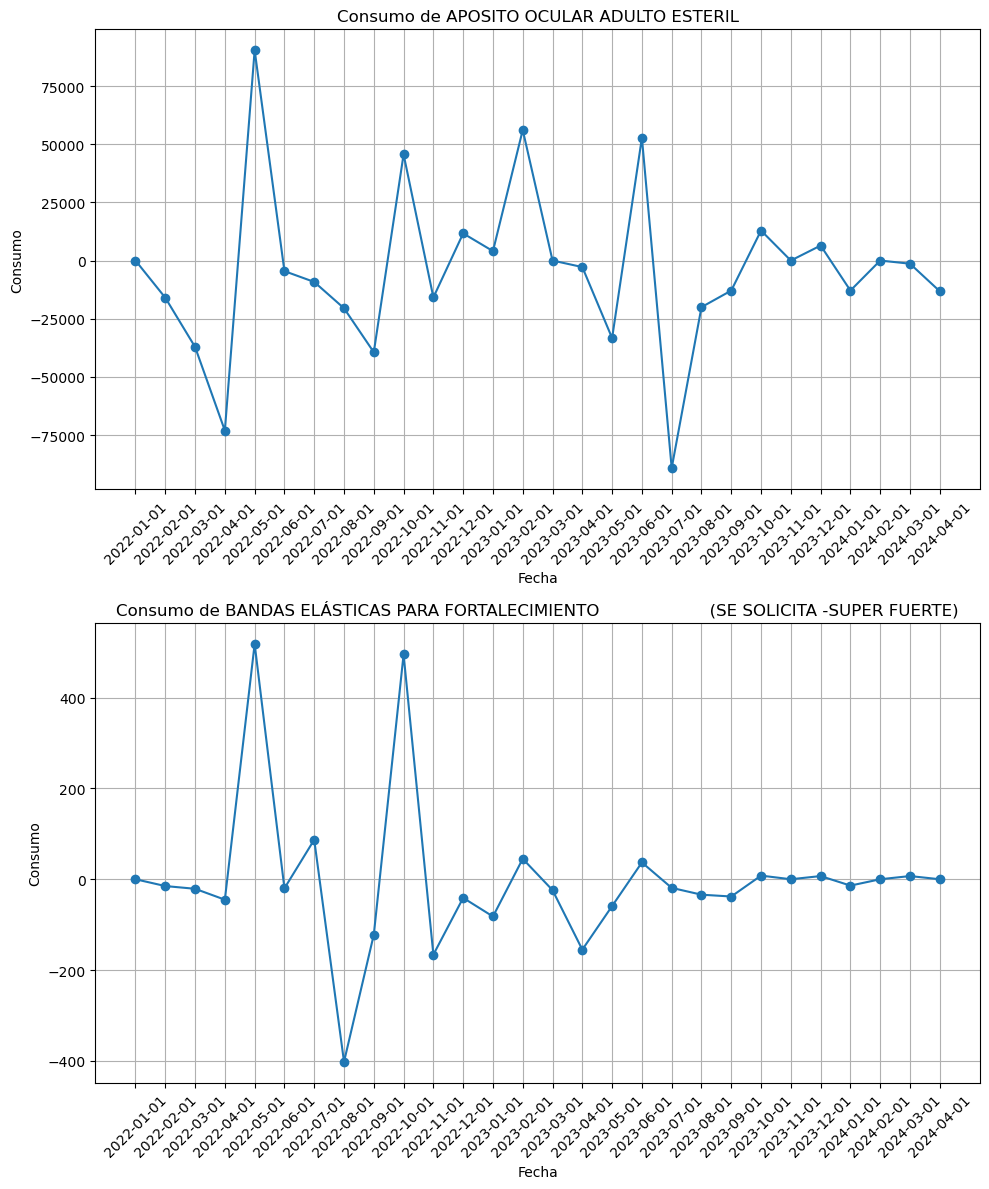

In [4]:
import matplotlib.pyplot as plt

# Seleccionar varios insumos
insumos = ['APOSITO OCULAR ADULTO ESTERIL', 'BANDAS ELÁSTICAS PARA FORTALECIMIENTO                     (SE SOLICITA -SUPER FUERTE)']  # Reemplaza con los nombres de los insumos que quieras graficar

# Crear subplots para cada insumo
fig, axs = plt.subplots(len(insumos), 1, figsize=(10, 6 * len(insumos)))

# Si solo hay un insumo, `axs` no será una lista
if len(insumos) == 1:
    axs = [axs]

for i, insumo in enumerate(insumos):
    df_insumo_consumo = consumption.loc[insumo]
    axs[i].plot(df_insumo_consumo.index, df_insumo_consumo.values, marker='o')
    axs[i].set_title(f'Consumo de {insumo}')
    axs[i].set_xlabel('Fecha')
    axs[i].set_ylabel('Consumo')
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje X

plt.tight_layout()
plt.show()

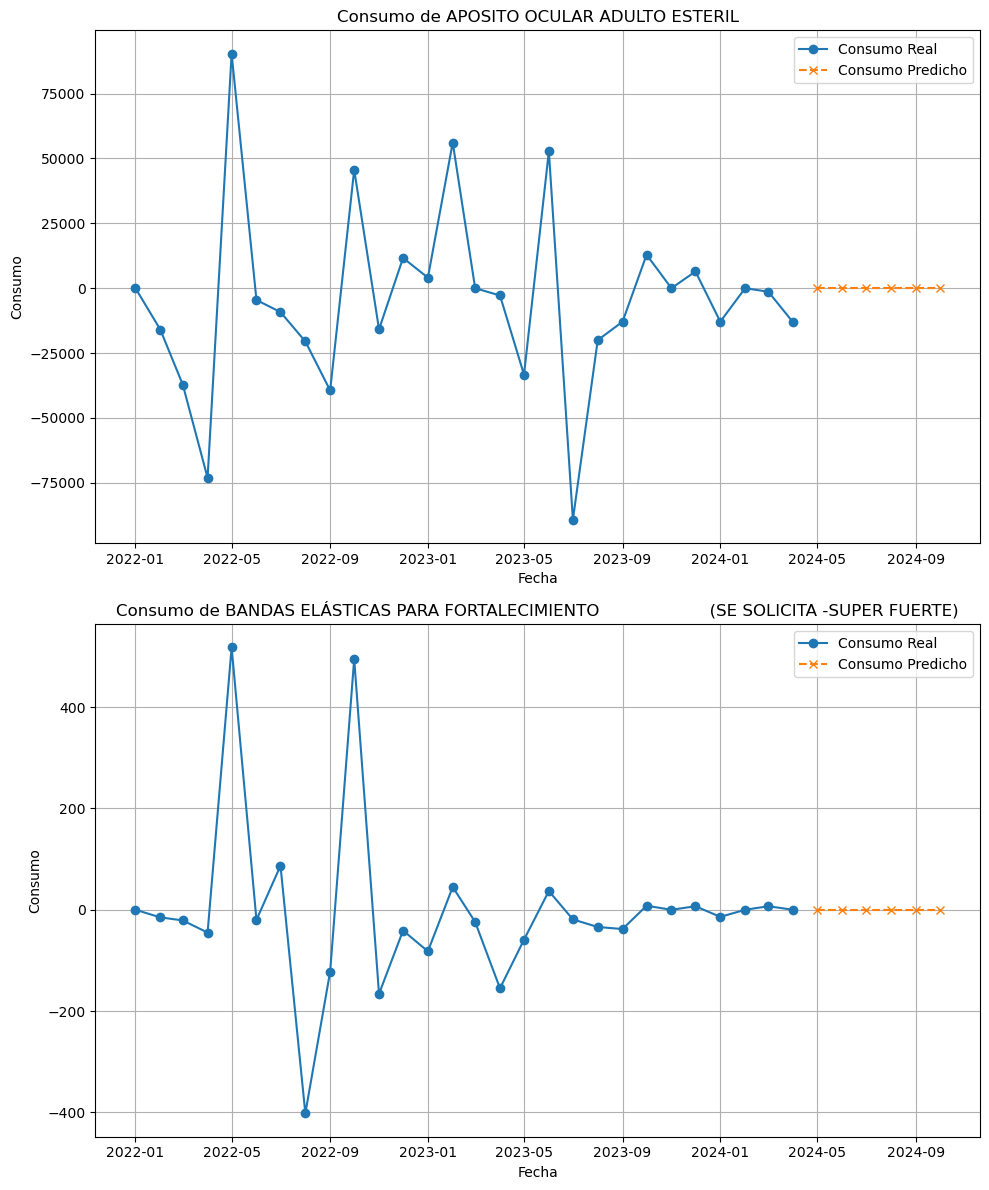

In [5]:
import matplotlib.pyplot as plt

# Seleccionar varios insumos
insumos = ['APOSITO OCULAR ADULTO ESTERIL', 'BANDAS ELÁSTICAS PARA FORTALECIMIENTO                     (SE SOLICITA -SUPER FUERTE)']  # Reemplaza con los nombres de los insumos que quieras graficar

# Crear subplots para cada insumo
fig, axs = plt.subplots(len(insumos), 1, figsize=(10, 6 * len(insumos)))

# Si solo hay un insumo, `axs` no será una lista
if len(insumos) == 1:
    axs = [axs]

for i, insumo in enumerate(insumos):
    df_insumo_consumo = consumption.loc[insumo]
    df_insumo_consumo.index = pd.to_datetime(df_insumo_consumo.index)  # Asegurarse de que el índice sea datetime

    df_pred = df_forecast[df_forecast['Insumo'] == insumo].set_index('Fecha')['Predicción']
    df_pred.index = pd.to_datetime(df_pred.index)  # Asegurarse de que el índice sea datetime

    # Graficar el consumo real
    axs[i].plot(df_insumo_consumo.index, df_insumo_consumo.values, marker='o', label='Consumo Real')

    # Graficar el consumo predicho
    axs[i].plot(df_pred.index, df_pred.values, marker='x', linestyle='--', label='Consumo Predicho')

    # Configurar el título y etiquetas del gráfico
    axs[i].set_title(f'Consumo de {insumo}')
    axs[i].set_xlabel('Fecha')
    axs[i].set_ylabel('Consumo')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()


In [6]:
df_forecast

Insumo      Fecha  \
2024-05-01                      APOSITO OCULAR ADULTO ESTERIL 2024-05-01   
2024-06-01                      APOSITO OCULAR ADULTO ESTERIL 2024-06-01   
2024-07-01                      APOSITO OCULAR ADULTO ESTERIL 2024-07-01   
2024-08-01                      APOSITO OCULAR ADULTO ESTERIL 2024-08-01   
2024-09-01                      APOSITO OCULAR ADULTO ESTERIL 2024-09-01   
...                                                       ...        ...   
2024-06-01  VENDA DE YESO     (SE SOLICITA DE FRAGUADO RÁP... 2024-06-01   
2024-07-01  VENDA DE YESO     (SE SOLICITA DE FRAGUADO RÁP... 2024-07-01   
2024-08-01  VENDA DE YESO     (SE SOLICITA DE FRAGUADO RÁP... 2024-08-01   
2024-09-01  VENDA DE YESO     (SE SOLICITA DE FRAGUADO RÁP... 2024-09-01   
2024-10-01  VENDA DE YESO     (SE SOLICITA DE FRAGUADO RÁP... 2024-10-01   

            Predicción  
2024-05-01         0.0  
2024-06-01         0.0  
2024-07-01         0.0  
2024-08-01         0.0  
2024-09-01         0.0  
...                ...  
2024-06-01         0.0  
2024-07-01         0.0  
2024-08-01         0.0  
2024-09-01         0.0  
2024-10-01         0.0  

[354 rows x 3 columns]

## LSTM

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import warnings

# Ignorar warnings de convergencia y otros warnings específicos
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Lista para almacenar los resultados y los insumos predecibles
results = []
predecibles_lstm = []

# Definir función para crear el modelo LSTM
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

for insumo in consumption.index.unique():
    # Filtrar los datos para el insumo actual
    df_insumo_consumo = consumption.loc[insumo]
    
    # Verificar que la serie temporal tenga al menos 12 puntos de datos
    if len(df_insumo_consumo) < 12:
        print(f"Not enough data for {insumo}")
        continue
    
    # Asegurar que los datos tengan frecuencia mensual y eliminar duplicados
    df_insumo_consumo = df_insumo_consumo[~df_insumo_consumo.index.duplicated(keep='first')]
    
    # Escalar los datos
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df_insumo_consumo.values.reshape(-1, 1))
    
    # Crear secuencias para el modelo LSTM
    generator = TimeseriesGenerator(scaled_data, scaled_data, length=12, batch_size=1)
    
    # Crear y entrenar el modelo
    model = create_model((12, 1))
    model.fit(generator, epochs=100, verbose=0)
    
    # Hacer predicciones para los próximos 6 meses
    pred_list = []
    batch = scaled_data[-12:].reshape((1, 12, 1))
    for i in range(6):
        pred = model.predict(batch)[0]
        pred_list.append(pred)
        batch = np.append(batch[:,1:,:], [[pred]], axis=1)
    
    # Invertir la escala de las predicciones
    forecast = scaler.inverse_transform(pred_list).flatten()
    
    # Almacenar los resultados
    result = pd.DataFrame({
        'Insumo': insumo,
        'Fecha': pd.date_range(start=df_insumo_consumo.index[-1], periods=7, freq='MS')[1:],  # Fechas de predicción
        'Predicción': forecast
    })
    results.append(result)
    predecibles_lstm.append(insumo)

# Convertir los resultados en un DataFrame
df_forecast_lstm = pd.concat(results)

# Mostrar el DataFrame de predicciones
print(df_forecast_lstm)


1/1 [==============================] - 0s 20ms/step
                                               Insumo      Fecha    Predicción
0                       APOSITO OCULAR ADULTO ESTERIL 2024-05-01  -2923.286569
1                       APOSITO OCULAR ADULTO ESTERIL 2024-06-01  -5394.197273
2                       APOSITO OCULAR ADULTO ESTERIL 2024-07-01  -8729.124117
3                       APOSITO OCULAR ADULTO ESTERIL 2024-08-01 -13271.183574
4                       APOSITO OCULAR ADULTO ESTERIL 2024-09-01 -12380.255079
..                                                ...        ...           ...
1   VENDA DE YESO     (SE SOLICITA DE FRAGUADO RÁP... 2024-06-01   -343.582587
2   VENDA DE YESO     (SE SOLICITA DE FRAGUADO RÁP... 2024-07-01    511.713378
3   VENDA DE YESO     (SE SOLICITA DE FRAGUADO RÁP... 2024-08-01   1036.476099
4   VENDA DE YESO     (SE SOLICITA DE FRAGUADO RÁP... 2024-09-01   1434.806359
5   VENDA DE YESO     (SE SOLICITA DE FRAGUADO RÁP... 2024-10-01   1657.907498


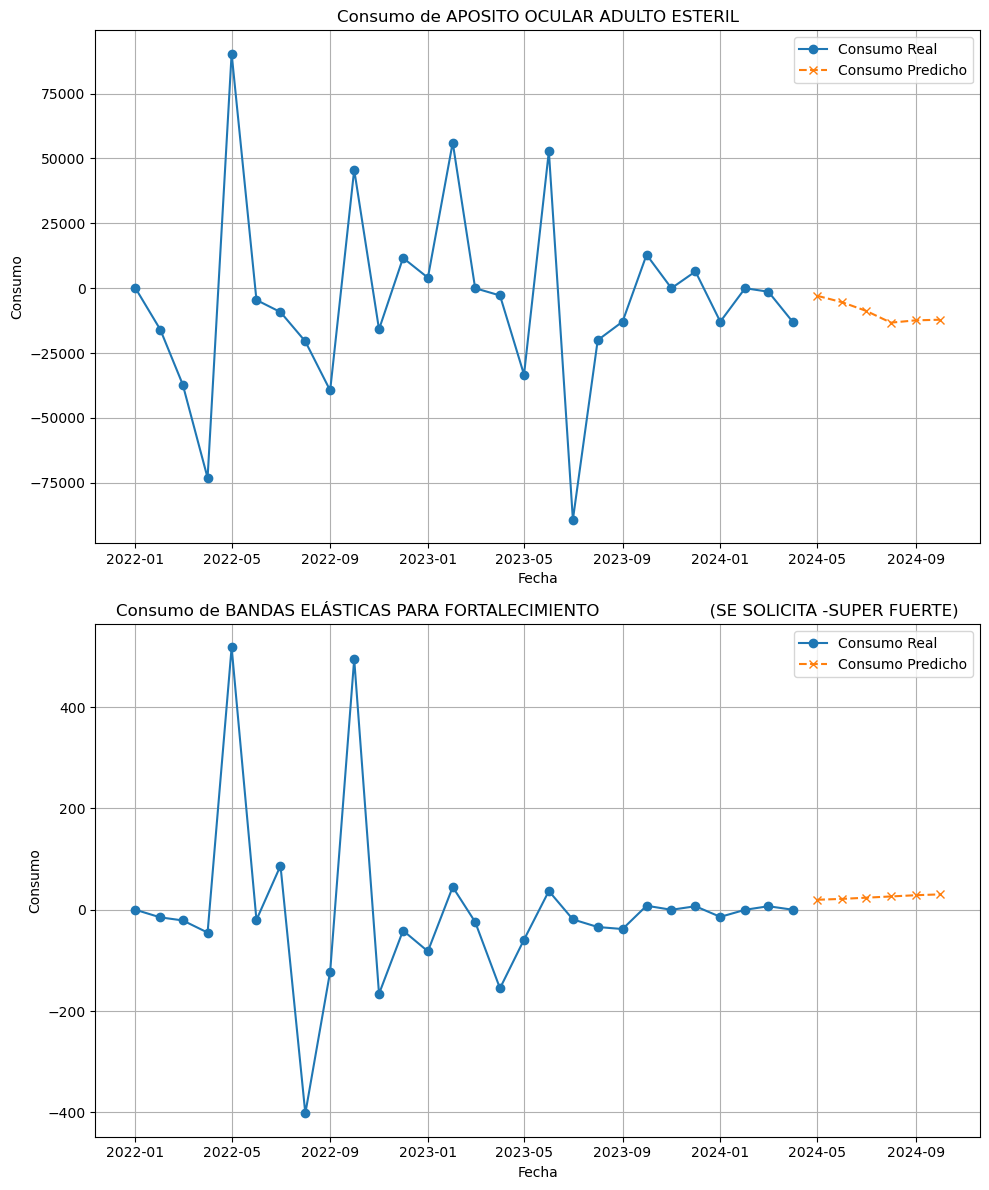

In [9]:
import matplotlib.pyplot as plt

# Seleccionar varios insumos
insumos = ['APOSITO OCULAR ADULTO ESTERIL', 'BANDAS ELÁSTICAS PARA FORTALECIMIENTO                     (SE SOLICITA -SUPER FUERTE)']  # Reemplaza con los nombres de los insumos que quieras graficar

# Crear subplots para cada insumo
fig, axs = plt.subplots(len(insumos), 1, figsize=(10, 6 * len(insumos)))

# Si solo hay un insumo, `axs` no será una lista
if len(insumos) == 1:
    axs = [axs]

for i, insumo in enumerate(insumos):
    df_insumo_consumo = consumption.loc[insumo]
    df_insumo_consumo.index = pd.to_datetime(df_insumo_consumo.index)  # Asegurarse de que el índice sea datetime

    df_pred = df_forecast_lstm[df_forecast_lstm['Insumo'] == insumo].set_index('Fecha')['Predicción']
    df_pred.index = pd.to_datetime(df_pred.index)  # Asegurarse de que el índice sea datetime

    # Graficar el consumo real
    axs[i].plot(df_insumo_consumo.index, df_insumo_consumo.values, marker='o', label='Consumo Real')

    # Graficar el consumo predicho
    axs[i].plot(df_pred.index, df_pred.values, marker='x', linestyle='--', label='Consumo Predicho')

    # Configurar el título y etiquetas del gráfico
    axs[i].set_title(f'Consumo de {insumo}')
    axs[i].set_xlabel('Fecha')
    axs[i].set_ylabel('Consumo')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()


## Prophet

In [17]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Configuración de Prophet
def train_prophet_model(df):
    df = df.reset_index()
    df.columns = ['ds', 'y']
    model = Prophet()
    model.fit(df)
    return model

# Entrenar el modelo y realizar predicciones
results = []
predecibles_prophet = []

for insumo in consumption.index.unique():
    df_insumo_consumo = consumption.loc[insumo]
    
    # Verificar que la serie temporal tenga al menos 2 puntos de datos
    if len(df_insumo_consumo) < 2:
        print(f"Not enough data for {insumo}")
        continue
    
    # Asegurar que los datos tengan frecuencia mensual y eliminar duplicados
    df_insumo_consumo = df_insumo_consumo[~df_insumo_consumo.index.duplicated(keep='first')]
    
    try:
        # Entrenar el modelo Prophet
        model = train_prophet_model(df_insumo_consumo)
        
        # Hacer predicciones para los próximos 6 meses
        future = model.make_future_dataframe(periods=6, freq='MS')
        forecast = model.predict(future)
        
        # Almacenar los resultados
        result = pd.DataFrame({
            'Insumo': insumo,
            'Fecha': forecast['ds'],
            'Predicción': forecast['yhat']
        })
        results.append(result[result['Fecha'] > df_insumo_consumo.index[-1]])
        predecibles_prophet.append(insumo)
    
    except Exception as e:
        print(f"Error processing {insumo}: {e}")

# Convertir los resultados en un DataFrame
df_forecast_prophet = pd.concat(results)

# Mostrar el DataFrame de predicciones
print(df_forecast_prophet)


C:\Users\kevin\anaconda3\envs\Feria\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
22:14:56 - cmdstanpy - INFO - Chain [1] start processing
22:14:56 - cmdstanpy - INFO - Chain [1] done processing
22:14:57 - cmdstanpy - INFO - Chain [1] start processing
22:14:57 - cmdstanpy - INFO - Chain [1] done processing
22:14:57 - cmdstanpy - INFO - Chain [1] start processing
22:14:57 - cmdstanpy - INFO - Chain [1] done processing
22:14:57 - cmdstanpy - INFO - Chain [1] start processing
22:14:57 - cmdstanpy - INFO - Chain [1] done processing
22:14:58 - cmdstanpy - INFO - Chain [1] start processing
22:14:58 - cmdstanpy - INFO - Chain [1] done processing
22:14:58 - cmdstanpy - INFO - Chain [1] start processing
22:14:58 - cmdstanpy - INFO - Chain [1] done processing
22:14

                                               Insumo      Fecha  \
28                      APOSITO OCULAR ADULTO ESTERIL 2024-05-01   
29                      APOSITO OCULAR ADULTO ESTERIL 2024-06-01   
30                      APOSITO OCULAR ADULTO ESTERIL 2024-07-01   
31                      APOSITO OCULAR ADULTO ESTERIL 2024-08-01   
32                      APOSITO OCULAR ADULTO ESTERIL 2024-09-01   
..                                                ...        ...   
29  VENDA DE YESO     (SE SOLICITA DE FRAGUADO RÁP... 2024-06-01   
30  VENDA DE YESO     (SE SOLICITA DE FRAGUADO RÁP... 2024-07-01   
31  VENDA DE YESO     (SE SOLICITA DE FRAGUADO RÁP... 2024-08-01   
32  VENDA DE YESO     (SE SOLICITA DE FRAGUADO RÁP... 2024-09-01   
33  VENDA DE YESO     (SE SOLICITA DE FRAGUADO RÁP... 2024-10-01   

       Predicción  
28  204256.704762  
29 -186133.492815  
30   77898.890262  
31  -39823.716070  
32  -84820.324118  
..            ...  
29   -9770.685120  
30    5639.486700  
31 

In [18]:
predecibles_prophet

['APOSITO OCULAR ADULTO ESTERIL',
 'BANDAS ELÁSTICAS PARA FORTALECIMIENTO                     (SE SOLICITA -SUPER FUERTE)',
 'BANDAS ELÁSTICAS PARA FORTALECIMIENTO                     (SE SOLICITA FUERTE) ',
 'BANDAS ELÁSTICAS PARA FORTALECIMIENTO.                    (SE SOLICITA SUAVE)',
 'BOLSA COLECTORA DE ORINA DE 30 A 35 ONZA DE CAPACIDAD     (900CC A 1050CC) DE PIERNA . ',
 'BOLSA INFUSORA A PRESION .SE SOLICITA BOLSA DE 1000cc DE CAPACIDAD',
 'BRAZALETE DE IDENTIFICACIÓN PARA ADULTOS.                (SE SOLICITA: 12 PULGADAS DE LONGITUD)',
 'BRAZALETE DE IDENTIFICACIÓN PEDIATRICA. SE SOLICITA: 8 PULGADAS DE LONGITUD',
 'CANULA NASOFARINGEA  DE 20 FR A  26 FR.  (SE SOLOCITA TAMAÑ0 26FR) ',
 'CANULA NASOFARINGEA  DE 28 FR A 30 FR. SE SOLOCITA TAMAÑ0 28FR   ',
 'CANULA NASOFARINGEA  DE 28 FR A 30 FR. SE SOLOCITA TAMAÑ0 30FR      ',
 'CANULA NASOFARINGEA  DE 32 FR A 36 FR.                        (SE SOLOCITA TAMAÑ0 34FR)',
 'CANULA NASOFARINGEA  DE 32 FR A 36 FR.  (SE SOLOCITA TAMAÑ

In [19]:
# Seleccionar varios insumos
#insumos = ['APOSITO OCULAR ADULTO ESTERIL', 'BANDAS ELÁSTICAS PARA FORTALECIMIENTO                     (SE SOLICITA -SUPER FUERTE)']  # Reemplaza con los nombres de los insumos que quieras graficar
insumos = predecibles_prophet
# Crear subplots para cada insumo
fig, axs = plt.subplots(len(insumos), 1, figsize=(10, 6 * len(insumos)))

# Si solo hay un insumo, `axs` no será una lista
if len(insumos) == 1:
    axs = [axs]

for i, insumo in enumerate(insumos):
    df_insumo_consumo = consumption.loc[insumo]
    df_insumo_consumo.index = pd.to_datetime(df_insumo_consumo.index)  # Asegurarse de que el índice sea datetime

    df_pred = df_forecast_prophet[df_forecast_prophet['Insumo'] == insumo].set_index('Fecha')['Predicción']
    df_pred.index = pd.to_datetime(df_pred.index)  # Asegurarse de que el índice sea datetime

    # Graficar el consumo real
    axs[i].plot(df_insumo_consumo.index, df_insumo_consumo.values, marker='o', label='Consumo Real')

    # Graficar el consumo predicho
    axs[i].plot(df_pred.index, df_pred.values, marker='x', linestyle='--', label='Consumo Predicho')

    # Configurar el título y etiquetas del gráfico
    axs[i].set_title(f'Consumo de {insumo}')
    axs[i].set_xlabel('Fecha')
    axs[i].set_ylabel('Consumo')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()


## SARIMAX

In [5]:
consumption

Fecha                                               2022-01-01  2022-02-01  \
Insumo                                                                       
APOSITO OCULAR ADULTO ESTERIL                              0.0    -15970.0   
BANDAS ELÁSTICAS PARA FORTALECIMIENTO          ...         0.0       -15.0   
BANDAS ELÁSTICAS PARA FORTALECIMIENTO          ...         0.0      -218.0   
BANDAS ELÁSTICAS PARA FORTALECIMIENTO.         ...         0.0      -255.0   
BOLSA COLECTORA DE ORINA DE 30 A 35 ONZA DE CAP...         0.0     -9326.0   
BOLSA INFUSORA A PRESION .SE SOLICITA BOLSA DE ...         0.0         0.0   
BRAZALETE DE IDENTIFICACIÓN PARA ADULTOS.      ...         0.0   -347400.0   
BRAZALETE DE IDENTIFICACIÓN PEDIATRICA. SE SOLI...         0.0   -176000.0   
CANULA NASOFARINGEA  DE 20 FR A  26 FR.  (SE SO...         0.0    -44400.0   
CANULA NASOFARINGEA  DE 28 FR A 30 FR. SE SOLOC...         0.0     -1200.0   
CANULA NASOFARINGEA  DE 28 FR A 30 FR. SE SOLOC...         0.0         0.0   
CANULA NASOFARINGEA  DE 32 FR A 36 FR.         ...         0.0         0.0   
CANULA NASOFARINGEA  DE 32 FR A 36 FR.  (SE SOL...         0.0     -2000.0   
CANULA NASOFARINGEA DE 32 FR A 36 FR.          ...         0.0     -2600.0   
CANÚLA DE TRAQUEOSTOMÍA.                      (...         0.0         0.0   
CANÚLA DE TRAQUEOSTOMÍA. SE SOLICITA TAMAÑO N° 8           0.0       -11.0   
CATETER DE HISTEROSONOGRAFIA, 5Fr O 7FR. SE SOL...         0.0         0.0   
CATETER INTRAVENOSO DE BIOSEGURIDAD 1. Catéter ...         0.0    -60550.0   
CEPILLO PARA LIMPIAR 75mm x 20mm x 15mm (FLEXIBLE)         0.0     -2650.0   
CEPILLO PLANO PARA LIMPIEZA DE 75MM X 20MM X 15...         0.0     -3550.0   
CINTURON SEGURIDAD PARA MARCHA DE ADULTO.      ...         0.0         0.0   
COBERTOR PARA SILLETA (PALETA)                             0.0      -200.0   
CONECTOR O EQUIPO PARA INFUSIÓN DE SOLUCIÓN PAR...         0.0    -20000.0   
CUCHILLETE ESPATULADO ESTILO CRESCENT                      0.0      -250.0   
ESPIROMETRO INCENTIVO PARA REALIZAR EJERCICIOS ...         0.0      -372.0   
GORRO PARA VARON.                                          0.0   -255400.0   
INJERTO VASCULAR CONICO CON ANILLOS INTEGRADOS ...         0.0       -36.0   
INSTRUMENTO PARA LIGAR VASOS DE TITANIUM, DESEC...         0.0       -20.0   
INSTRUMENTO PARA PROLAPSO RECTAL Y HEMORROIDES             0.0       -80.0   
JERINGUILLA 50-60ML. SE SOLICITA  50ml, PUNTA R...         0.0    -70700.0   
JUEGO COMPLETO PARA CATETERIZACIÓN VESICAL CON ...         0.0     -3300.0   
JUEGO COMPLETO PARA SUCCIÓN DE VÍAS RESPIRATORI...         0.0      -250.0   
JUEGO DE BOLSA DESECHABLE PARA CADÁVER                     0.0     -6350.0   
JUEGO DE ROPA DESECHABLE PARA CAMA DE PACIENTE             0.0     45550.0   
LLAVE DE TRES VIAS CON DOS (2) CONECTORES,ESTÉRIL.         0.0     -4000.0   
MALLA EXPANDIBLE TUBULAR            (SE SOLICIT...         0.0        98.0   
MALLA EXPANDIBLE TUBULAR.   (SE SOLICITA TAMAÑO...         0.0     -2073.0   
PROTECTOR PLÁSTICO PARA EL OJO                             0.0      -420.0   
ROPA DESECHABLE DE NEUROCIRUGÍA                            0.0       128.0   
SET DE ROPA\n                                              0.0     -1200.0   
SET DE ROPA DESECHABLE PARA DILATACION Y CURETAJE          0.0      -264.0   
SET DE ROPA PARA CITOSCOPÍA                                0.0      -500.0   
SISTEMA DE SUCCION E IRRIGACION LAPAROSCOPICA C...         0.0       -22.0   
SUTURA CATGUT CRÓMICO, CALIBRE 0, LONGITUD 67 A...         0.0     -4248.0   
SUTURA: ACIDO POLIGLICÓLICO TRENZADO, CALIBRE 3...         0.0      -384.0   
SUTURA: POLIPROPILENO MONOFILAMENTO CALIBRE 3-0...         0.0      -144.0   
SUTURA: POLIPROPILENO MONOFILAMENTO, CALIBRE 5-...         0.0     -1008.0   
SUTURA: POLIPROPILENO MONOFILAMENTO, CALIBRE 7-0           0.0         0.0   
SUTURA: SEDA NEGRA TRENZADA  SILICONIZADA, CALI...         0.0         0.0   
TERMOMETRO TIMPANICO D

C:\Users\kevin\AppData\Local\Temp\ipykernel_35004\2996140848.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insumo_df['Fecha'] = pd.to_datetime(insumo_df['Fecha'])
C:\Users\kevin\AppData\Local\Temp\ipykernel_35004\2996140848.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  insumo_df = insumo_df.resample('M').sum()


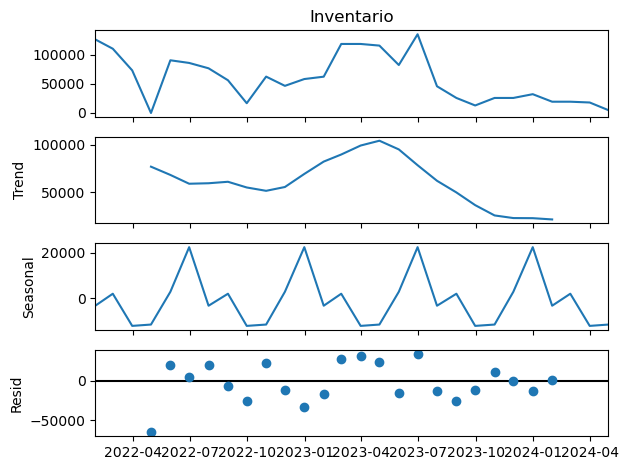

C:\Users\kevin\anaconda3\envs\Feria\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


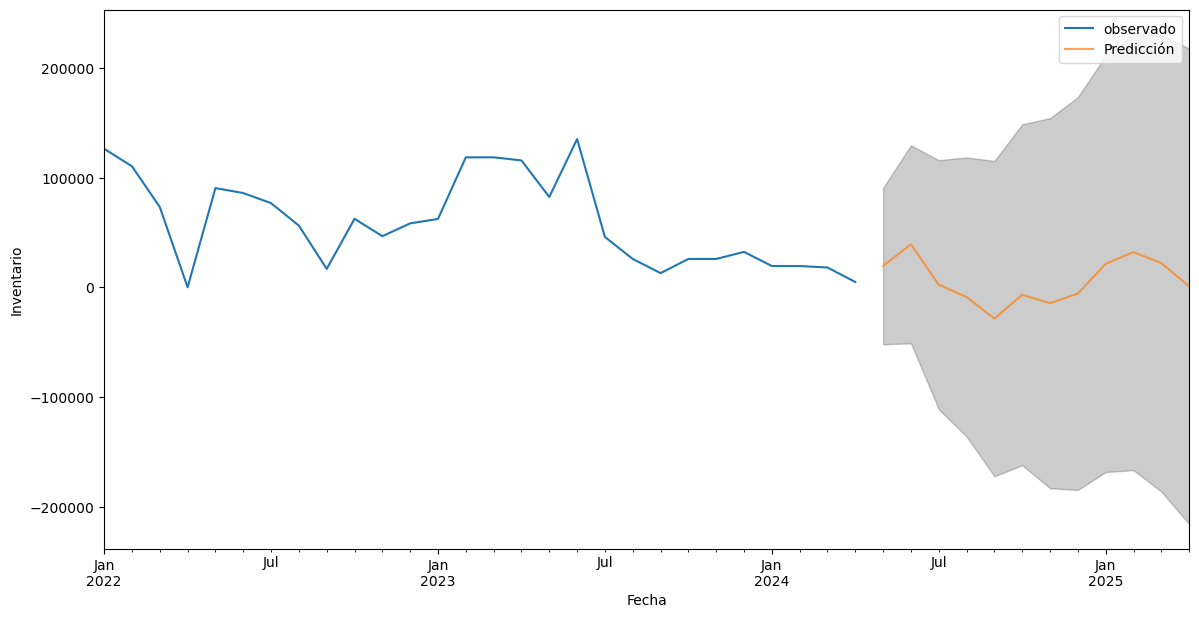

2024-05-31    19383.584593
2024-06-30    39154.197007
2024-07-31     2344.400019
2024-08-31    -8869.789091
2024-09-30   -28569.173882
2024-10-31    -6810.891201
2024-11-30   -14497.562975
2024-12-31    -5718.353960
2025-01-31    21364.904264
2025-02-28    32040.059415
2025-03-31    22014.240803
2025-04-30      841.447925
Freq: ME, Name: predicted_mean, dtype: float64
La fecha más óptima para pedir el insumo 'APOSITO OCULAR ADULTO ESTERIL' es 2024-09-30 00:00:00, con una cantidad óptima de -28569.17 unidades.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Filtrar el insumo específico
insumo_especifico = 'APOSITO OCULAR ADULTO ESTERIL'  # Reemplazar con el nombre del insumo deseado
insumo_df = df_combined[df_combined['Insumo'] == insumo_especifico]

# Convertir la columna 'Fecha' a formato datetime
insumo_df['Fecha'] = pd.to_datetime(insumo_df['Fecha'])

# Establecer la columna 'Fecha' como índice
insumo_df.set_index('Fecha', inplace=True)

# Resamplear los datos para asegurarnos de que están en una base mensual
insumo_df = insumo_df.resample('M').sum()

# Especificar el periodo de estacionalidad
period = 6  # Asumimos que hay un ciclo anual de 12 meses

# Descomponer la serie temporal para analizar tendencia y estacionalidad
decomposition = seasonal_decompose(insumo_df['Inventario'], model='additive', period=period)
fig = decomposition.plot()
plt.show()

# Ajustar un modelo SARIMA para predicción
model = SARIMAX(insumo_df['Inventario'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Hacer una predicción a futuro
pred = results.get_forecast(steps=12)  # Predicción para los próximos 12 meses
pred_ci = pred.conf_int()

# Graficar la predicción
ax = insumo_df['Inventario'].plot(label='observado', figsize=(14, 7))
pred.predicted_mean.plot(ax=ax, label='Predicción', alpha=.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Fecha')
ax.set_ylabel('Inventario')
plt.legend()
plt.show()

# Mostrar la predicción
predicted_values = pred.predicted_mean
print(predicted_values)

# Encontrar la fecha más óptima para pedir la cantidad óptima
optimal_order_date = predicted_values.idxmin()
optimal_order_quantity = predicted_values.min()

In [7]:
import pandas as pd

# Definir la cantidad adicional de seguridad
cantidad_adicional = 5000

# Generar avisos para cada mes con inventario negativo
for fecha, inventario in predicted_values.items():
    if inventario < 0:
        mes_anterior = pd.to_datetime(fecha) - pd.DateOffset(months=1)
        cantidad_a_pedir = abs(inventario) + cantidad_adicional
        print(f"Debe realizar un pedido del insumo '{insumo_especifico}' al finalizar el mes anterior ({mes_anterior.strftime('%Y-%m-%d')}) de {cantidad_a_pedir:.2f} unidades para cubrir el déficit proyectado en {fecha}.")

# Mostrar los resultados predichos
print(predicted_values)

Debe realizar un pedido del insumo 'APOSITO OCULAR ADULTO ESTERIL' al finalizar el mes anterior (2024-07-31) de 13869.79 unidades para cubrir el déficit proyectado en 2024-08-31 00:00:00.
Debe realizar un pedido del insumo 'APOSITO OCULAR ADULTO ESTERIL' al finalizar el mes anterior (2024-08-30) de 33569.17 unidades para cubrir el déficit proyectado en 2024-09-30 00:00:00.
Debe realizar un pedido del insumo 'APOSITO OCULAR ADULTO ESTERIL' al finalizar el mes anterior (2024-09-30) de 11810.89 unidades para cubrir el déficit proyectado en 2024-10-31 00:00:00.
Debe realizar un pedido del insumo 'APOSITO OCULAR ADULTO ESTERIL' al finalizar el mes anterior (2024-10-30) de 19497.56 unidades para cubrir el déficit proyectado en 2024-11-30 00:00:00.
Debe realizar un pedido del insumo 'APOSITO OCULAR ADULTO ESTERIL' al finalizar el mes anterior (2024-11-30) de 10718.35 unidades para cubrir el déficit proyectado en 2024-12-31 00:00:00.
2024-05-31    19383.584593
2024-06-30    39154.197007
2024-0

C:\Users\kevin\AppData\Local\Temp\ipykernel_31708\622716527.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  insumo_df = insumo_df.resample('M').sum()


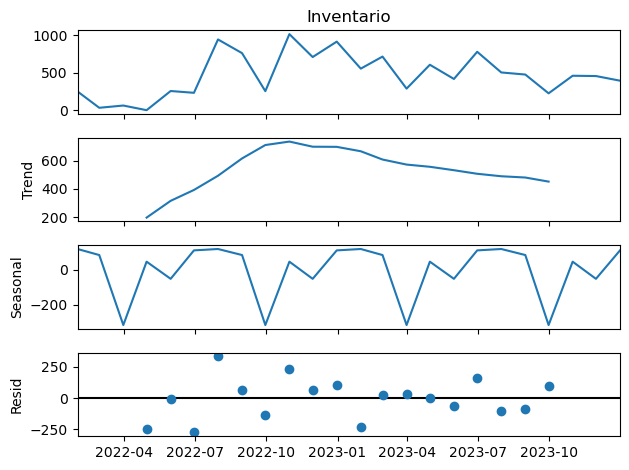

C:\Users\kevin\anaconda3\envs\Feria\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\kevin\anaconda3\envs\Feria\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


R^2: -0.757742826481913
MAPE: 3.431718320535247e+17
MSE: 34657.76685830917
RMSE: 186.1659658968555


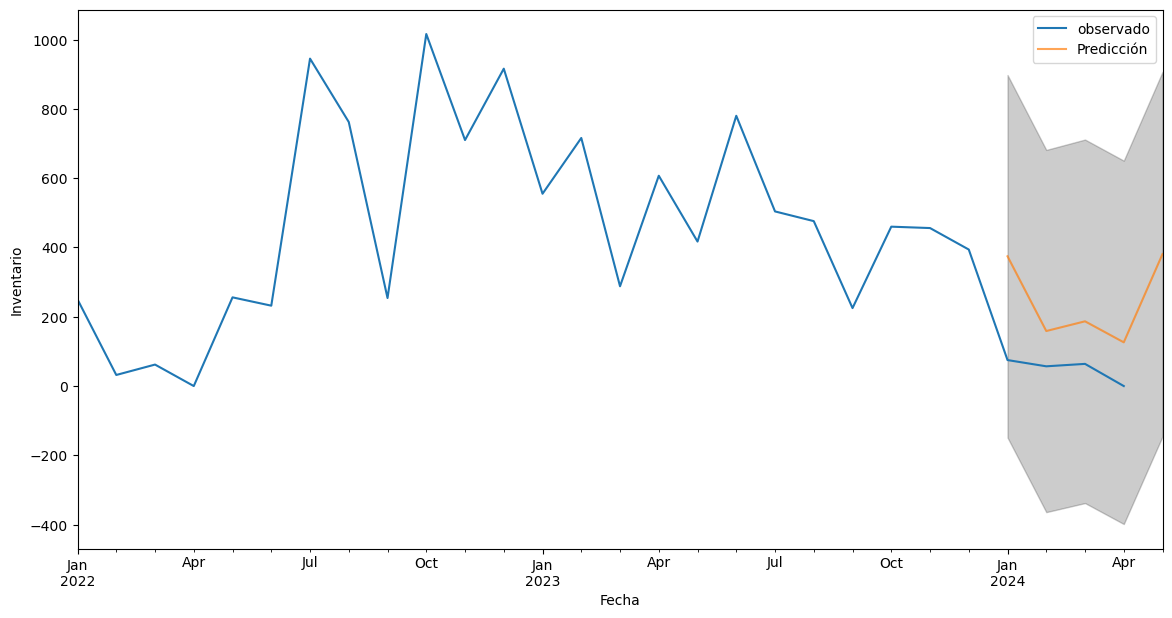

2024-01-31    374.523792
2024-02-29    158.809613
2024-03-31    186.845268
2024-04-30    126.183178
2024-05-31    380.997269
Freq: ME, Name: predicted_mean, dtype: float64
La fecha más óptima para pedir el insumo 'BANDAS ELÁSTICAS PARA FORTALECIMIENTO                     (SE SOLICITA FUERTE) ' es 2024-04-30 00:00:00, con una cantidad óptima de 126.18 unidades.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_error

# Filtrar el insumo específico
# 
# INJERTO VASCULAR CONICO CON ANILLOS INTEGRADOS AL PTFE.   SE SOLICITA:  CON HEPARINA BIOACTIVA, CAN ANILLO INTEGRAD, INJERTO VASCULAR CÓNICO ENTRE 4MM y  7MM , LONGITUD 45CM
# 
insumo_especifico = 'BANDAS ELÁSTICAS PARA FORTALECIMIENTO                     (SE SOLICITA FUERTE) '  # Reemplazar con el nombre del insumo deseado
insumo_df = df_combined[df_combined['Insumo'] == insumo_especifico].copy()

# Convertir la columna 'Fecha' a formato datetime
insumo_df['Fecha'] = pd.to_datetime(insumo_df['Fecha'], errors='coerce')

# Eliminar filas con fechas inválidas
insumo_df = insumo_df.dropna(subset=['Fecha'])

# Establecer la columna 'Fecha' como índice
insumo_df.set_index('Fecha', inplace=True)

# Resamplear los datos para asegurarnos de que están en una base mensual
insumo_df = insumo_df.resample('M').sum()

# Verificar si hay suficientes datos
if len(insumo_df) < 12:
    raise ValueError("No hay suficientes datos para realizar el análisis")

# Separar los datos en conjuntos de entrenamiento y prueba
train_end = '2023-12-31'  # Ajustar según tus datos
train_data = insumo_df[:train_end]
test_data = insumo_df[train_end:]

# Especificar el periodo de estacionalidad
period = 6  # Ajustar según el análisis de estacionalidad

# Descomponer la serie temporal para analizar tendencia y estacionalidad
decomposition = seasonal_decompose(train_data['Inventario'], model='additive', period=period)
fig = decomposition.plot()
plt.show()

# Ajustar un modelo SARIMA para predicción
model = SARIMAX(train_data['Inventario'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Hacer una predicción a futuro
pred = results.get_forecast(steps=len(test_data))  # Predicción para los próximos pasos de test_data
pred_ci = pred.conf_int()

# Calcular R^2 y MAPE
y_true = test_data['Inventario']
y_pred = pred.predicted_mean

r2 = r2_score(y_true, y_pred, force_finite=True)
mape = mean_absolute_percentage_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rsme = np.sqrt(mse)

print(f"R^2: {r2}")
print(f"MAPE: {mape}")
print(f"MSE: {mse}")
print(f"RMSE: {rsme}")

# Graficar la predicción
ax = insumo_df['Inventario'].plot(label='observado', figsize=(14, 7))
pred.predicted_mean.plot(ax=ax, label='Predicción', alpha=.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Fecha')
ax.set_ylabel('Inventario')
plt.legend()
plt.show()

# Mostrar la predicción
predicted_values = pred.predicted_mean
print(predicted_values)

# Encontrar la fecha más óptima para pedir la cantidad óptima
optimal_order_date = predicted_values.idxmin()
optimal_order_quantity = predicted_values.min()

print(f"La fecha más óptima para pedir el insumo '{insumo_especifico}' es {optimal_order_date}, con una cantidad óptima de {optimal_order_quantity:.2f} unidades.")


## GridSearch SARIMAX

In [19]:
# Filtrar el insumo específico
insumo_especifico = 'APOSITO OCULAR ADULTO ESTERIL'  # Reemplazar con el nombre del insumo deseado

In [ ]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

insumo_df = df_combined[df_combined['Insumo'] == insumo_especifico].copy()

# Convertir la columna 'Fecha' a formato datetime
insumo_df.loc[:, 'Fecha'] = pd.to_datetime(insumo_df['Fecha'])

# Establecer la columna 'Fecha' como índice
insumo_df.set_index('Fecha', inplace=True)

# Resamplear los datos para asegurarnos de que están en una base mensual
insumo_df = insumo_df.resample('M').sum()

# Definir el periodo de estacionalidad
period = 12  # Asumimos que hay un ciclo anual de 12 meses

# Grid Search para parámetros SARIMA
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], period) for x in pdq]

best_aic = np.inf
best_params = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(insumo_df['Inventario'], order=param, seasonal_order=seasonal_param)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, seasonal_param)
        except:
            continue

print(f'Best SARIMA parameters: {best_params} with AIC: {best_aic}')

# Ajustar el modelo SARIMA con los mejores parámetros
model = SARIMAX(insumo_df['Inventario'], order=best_params[0], seasonal_order=best_params[1])
results = model.fit()

# Hacer una predicción a futuro
pred = results.get_forecast(steps=12)  # Predicción para los próximos 12 meses
pred_ci = pred.conf_int()

# Graficar la predicción
ax = insumo_df['Inventario'].plot(label='observado', figsize=(14, 7))
pred.predicted_mean.plot(ax=ax, label='Predicción', alpha=.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Fecha')
ax.set_ylabel('Inventario')
plt.legend()
plt.show()

# Mostrar la predicción
predicted_values = pred.predicted_mean
print(predicted_values)

# Generar avisos para cada mes con inventario negativo
cantidad_adicional = 5000

for fecha, inventario in predicted_values.items():
    if inventario < 0:
        mes_anterior = pd.to_datetime(fecha) - pd.DateOffset(months=1)
        cantidad_a_pedir = abs(inventario) + cantidad_adicional
        print(f"Debe realizar un pedido del insumo '{insumo_especifico}' al finalizar el mes anterior ({mes_anterior.strftime('%Y-%m-%d')}) de {cantidad_a_pedir:.2f} unidades para cubrir el déficit proyectado en {fecha}.")


C:\Users\kevin\AppData\Local\Temp\ipykernel_19376\1987250652.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insumo_df['Fecha'] = pd.to_datetime(insumo_df['Fecha'])
C:\Users\kevin\anaconda3\envs\Feria\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\kevin\anaconda3\envs\Feria\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\kevin\anaconda3\envs\Feria\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\kevin

In [ ]:
import pandas as pd

# Definir la cantidad adicional de seguridad
cantidad_adicional = 5000

# Generar avisos para cada mes con inventario negativo
for fecha, inventario in predicted_values.items():
    if inventario < 0:
        mes_anterior = pd.to_datetime(fecha) - pd.DateOffset(months=1)
        cantidad_a_pedir = abs(inventario) + cantidad_adicional
        print(f"Debe realizar un pedido del insumo '{insumo_especifico}' al finalizar el mes anterior ({mes_anterior.strftime('%Y-%m-%d')}) de {cantidad_a_pedir:.2f} unidades para cubrir el déficit proyectado en {fecha}.")

# Mostrar los resultados predichos
print(predicted_values)
